In [614]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:\\Data Analyst Projects\\Practice Datasets\\Used Car Dataset.csv')

In [615]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [616]:
data

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75


In [617]:
data.describe()

,Unnamed: 0,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1553.000000,1550.000000,1.550000e+03,1.550000e+03,1.549000e+03,1553.000000
mean,776.000000,91.480361,52841.931101,236.927277,1.471857e+10,1.471857e+10,1.423989e+04,166.141494
std,448.456798,2403.424060,40067.800347,585.964295,2.185629e+11,2.185629e+11,9.666241e+04,3478.855090
min,0.000000,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,388.000000,5.000000,30000.000000,16.342500,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,776.000000,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,1164.000000,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,1552.000000,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


So what I notice that will have to be changed, is this id column that got added and is unnamed, it will be removed. The car name will have to go, dummies for insurance validity, fuel type, transmission and ownership and find out a way to change the registration year

Now I will be going through each column because I notice some erros in this quick display of the data by checking the unique values and seeing what changes need to be made

In [618]:
data['insurance_validity'].unique()

array(['Comprehensive', 'Third Party insurance', 'Zero Dep',
       'Third Party', 'Petrol', 'Not Available'], dtype=object)

In [619]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', '5 Seats'], dtype=object)

In [620]:
data['seats'].unique()

array([    5,     6,     7,     4,     8, 67000], dtype=int64)

In [621]:
# changing the name of the column because it was misspelled
data['ownership'] = data['ownsership']

In [622]:
data = data.drop(['ownsership'], axis=1)

In [623]:
data['ownership'].unique()

array(['First Owner', 'Second Owner', 'Third Owner', '2993 cc', '1461 cc',
       '998 cc', '1995 cc', '1451 cc', '1998 cc', '1498 cc', '1497 cc',
       '1996 cc', '1950 cc', '2013', 'Fifth Owner', '1199 cc', '1248 cc',
       '999 cc', '1197 cc', '1984 cc', '2999 cc', '1968 cc'], dtype=object)

There is some values that aren't meant for this column, so I will drop those rows

In [624]:
data['ownership'].unique()
mask = data['ownership'].astype(str).str.contains('cc', case=False, na=False)
rows_with_cc = data[mask]
print(len(rows_with_cc['ownership']))

48


In [625]:
data.drop(data[mask].index, inplace=True)

As we see here there are 48 rows with a data entry error here, so I will remove these as the value of cc has no place in the ownership column

In [626]:
data['manufacturing_year'].unique()

array(['2017', '2020', '2018', '2019', '2015', '2021', '2014', '2022',
       '2010', '2011', '2023', '2016', '2009', '2013', '2012',
       'Air Conditioner', '2007'], dtype=object)

In [627]:
data['manufacturing_year'].unique()
mask = data['manufacturing_year'].astype(str).str.contains('Air Conditioner', case=False, na=False)
rows_with_cc = data[mask]
print(len(rows_with_cc['manufacturing_year']))
data.drop(data[mask].index, inplace=True)

2


In [628]:
data['manufacturing_year'] = pd.to_datetime(data['manufacturing_year'])

So now we see that almost everything is taken care of. However we do have some null values, and the manufacturing year should be in date time format, and we need to drop the unnamed column still

In [629]:
# check to see if it is right, and it is
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1503 non-null   int64         
 1   car_name            1503 non-null   object        
 2   registration_year   1503 non-null   object        
 3   insurance_validity  1503 non-null   object        
 4   fuel_type           1503 non-null   object        
 5   seats               1503 non-null   int64         
 6   kms_driven          1503 non-null   int64         
 7   transmission        1503 non-null   object        
 8   manufacturing_year  1503 non-null   datetime64[ns]
 9   mileage(kmpl)       1500 non-null   float64       
 10  engine(cc)          1500 non-null   float64       
 11  max_power(bhp)      1500 non-null   float64       
 12  torque(Nm)          1499 non-null   float64       
 13  price(in lakhs)     1503 non-null   float64       
 1

Now we see that columns 10-13 have null values, but it is only 3 or 4 values missing, so we could use the mean to fill those values

In [630]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

data['mileage(kmpl)'] = imputer.fit_transform(data[['mileage(kmpl)']])
data['engine(cc)'] = imputer.fit_transform(data[['engine(cc)']])
data['max_power(bhp)'] = imputer.fit_transform(data[['max_power(bhp)']])
data['torque(Nm)'] = imputer.fit_transform(data[['torque(Nm)']])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1503 non-null   int64         
 1   car_name            1503 non-null   object        
 2   registration_year   1503 non-null   object        
 3   insurance_validity  1503 non-null   object        
 4   fuel_type           1503 non-null   object        
 5   seats               1503 non-null   int64         
 6   kms_driven          1503 non-null   int64         
 7   transmission        1503 non-null   object        
 8   manufacturing_year  1503 non-null   datetime64[ns]
 9   mileage(kmpl)       1503 non-null   float64       
 10  engine(cc)          1503 non-null   float64       
 11  max_power(bhp)      1503 non-null   float64       
 12  torque(Nm)          1503 non-null   float64       
 13  price(in lakhs)     1503 non-null   float64       
 1

In [631]:
data = data.drop(['car_name'], axis=1)

In [632]:
data = data.drop(['Unnamed: 0'], axis=1)

In [633]:
data = data.drop(['registration_year'], axis=1)

In [634]:
data['age'] = pd.Timestamp('now') - data['manufacturing_year']
data['age']

0      2584 days 00:54:44.977053
1      1489 days 00:54:44.977053
2      2219 days 00:54:44.977053
3      1854 days 00:54:44.977053
4      1854 days 00:54:44.977053
                  ...           
1547    758 days 00:54:44.977053
1548   1489 days 00:54:44.977053
1550   2584 days 00:54:44.977053
1551   2219 days 00:54:44.977053
1552   2219 days 00:54:44.977053
Name: age, Length: 1503, dtype: timedelta64[ns]

In [635]:
data['age'] = pd.to_numeric(data['age'])

In [636]:
data = data.drop(['manufacturing_year'], axis=1)

In [637]:
data = data.join(pd.get_dummies(data.insurance_validity)).drop(['insurance_validity'], axis=1)

In [638]:
data = data.join(pd.get_dummies(data.fuel_type)).drop(['fuel_type'], axis=1)

In [639]:
data = data.join(pd.get_dummies(data.ownership)).drop(['ownership'], axis=1)

In [640]:
data = data.join(pd.get_dummies(data.transmission)).drop(['transmission'], axis=1)

In [641]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 0 to 1552
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   seats                  1503 non-null   int64  
 1   kms_driven             1503 non-null   int64  
 2   mileage(kmpl)          1503 non-null   float64
 3   engine(cc)             1503 non-null   float64
 4   max_power(bhp)         1503 non-null   float64
 5   torque(Nm)             1503 non-null   float64
 6   price(in lakhs)        1503 non-null   float64
 7   age                    1503 non-null   int64  
 8   Comprehensive          1503 non-null   bool   
 9   Not Available          1503 non-null   bool   
 10  Third Party            1503 non-null   bool   
 11  Third Party insurance  1503 non-null   bool   
 12  Zero Dep               1503 non-null   bool   
 13  CNG                    1503 non-null   bool   
 14  Diesel                 1503 non-null   bool   
 15  Petrol   

Now we should have all of the data cleaning done, we can start getting into the model

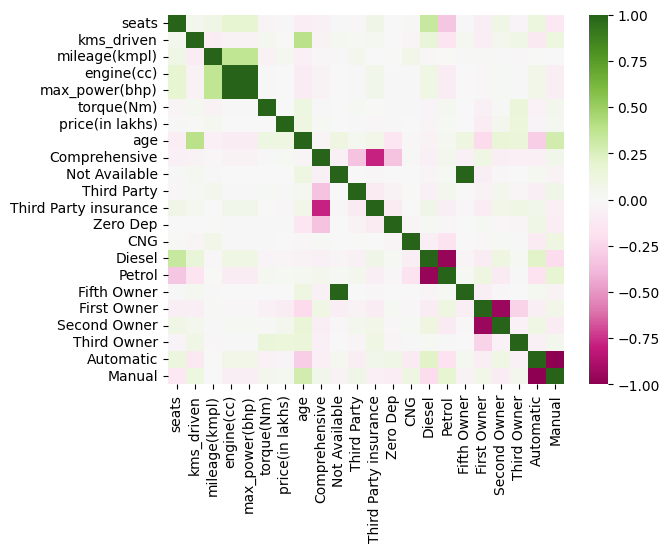

In [642]:
sns.heatmap(data.corr(numeric_only=True), cmap="PiYG")
plt.show()

In [643]:
from sklearn.model_selection import train_test_split

X = data.drop(['price(in lakhs)'], axis=1)
y = data['price(in lakhs)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [644]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [645]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(X_train, y_train)

LinearRegression()

In [646]:
y_pred_mlr = mlr.predict(X_test)

print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 4.79718451e+01 -2.13450375e+01  1.34467876e+03  1.68739136e+02
  3.08896797e+02 -2.25128522e+02 -4.93281895e+02  6.91195670e+02
  2.95469317e+01  9.00023713e+01  8.45405082e+02  1.57402729e+02
 -3.53896444e+02  4.75861963e+02  4.83891894e+01 -3.67790237e+02
 -2.27709713e+02 -1.30904580e+02  5.98246804e+02 -3.31106489e+01
 -9.80668096e+01  1.15828914e+03  2.18569561e+01 -3.10203948e+02
 -2.48990602e+02  1.02295023e+03  2.58044498e+02  3.23018537e+02
  8.03190114e+01  3.69587196e+02 -2.93437089e+02  1.39749474e+02
  4.69564204e+02 -1.64093088e+02 -2.74307505e+02  1.03249556e+03
 -3.51143801e+02 -5.61076132e+01  5.65848030e+01 -1.53236705e+02
  6.31527704e+02 -1.63293241e+02  3.60350587e+02  1.01082337e+02
  8.13220742e+02  4.01295729e+02  2.99768236e+02 -2.17778715e+01
  1.43047795e+02  6.70141847e+01  5.95613892e+02  5.29247659e+02
  2.58044498e+02 -5.39738008e+02 -9.54564227e+01 -2.53824746e+02
 -3.75703986e+02  2.76086953e+02  5.32558676e+01 -1.39521927e+02


In [647]:
mlr.score(X_test, y_test)

0.01999747288469611

We find out that in this dataset, our model is not good at predicting values. This is in part to the data coming from web scraping and from resellers, so they may not have ideal prices listed